In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [4]:
df = yf.download('CSCO', 
                      start='2008-01-01', 
                      end='2018-04-01', 
                      progress=False, 
                      interval='1mo'
)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-01,27.000000,27.299999,22.299999,24.500000,17.717836,1.502588e+09
2008-02-01,24.620001,25.150000,21.770000,24.389999,17.638287,1.620047e+09
2008-03-01,24.350000,25.990000,23.540001,24.090000,17.421335,1.296939e+09
2008-04-01,24.520000,26.290001,22.910000,25.639999,18.542253,1.086970e+09
2008-05-01,25.639999,27.000000,24.900000,26.719999,19.323288,1.113842e+09


In [5]:
df.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)
df.head()

,Close
Date,
2008-01-01,24.500000
2008-02-01,24.389999
2008-03-01,24.090000
2008-04-01,25.639999
2008-05-01,26.719999


In [6]:
df.dropna(subset=['Close'],inplace=True)
df.head()

,Close
Date,
2008-01-01,24.500000
2008-02-01,24.389999
2008-03-01,24.090000
2008-04-01,25.639999
2008-05-01,26.719999


In [7]:
df.tail()

,Close
Date,
2017-11-01,37.299999
2017-12-01,38.299999
2018-01-01,41.540001
2018-02-01,44.779999
2018-03-01,42.889999


In [8]:
df.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01'],
              dtype='datetime64[ns]', name='Date', length=123, freq=None)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,123.0,24.30691,5.98727,14.57,19.934999,23.43,27.585,44.779999


<AxesSubplot:xlabel='Date'>

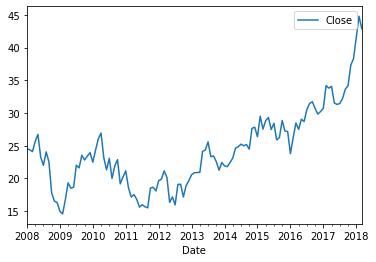

In [10]:
df.plot()

In [11]:
time_series = df['Close']

In [12]:
type(time_series)

pandas.core.series.Series

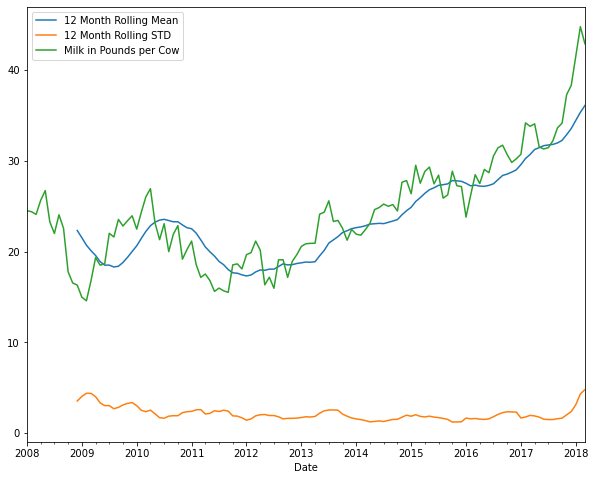

In [13]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(10,8))
time_series.rolling(12).std().plot(label='12 Month Rolling STD')
time_series.plot(label='Milk in Pounds per Cow')
plt.legend();

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
decomp = seasonal_decompose(time_series)

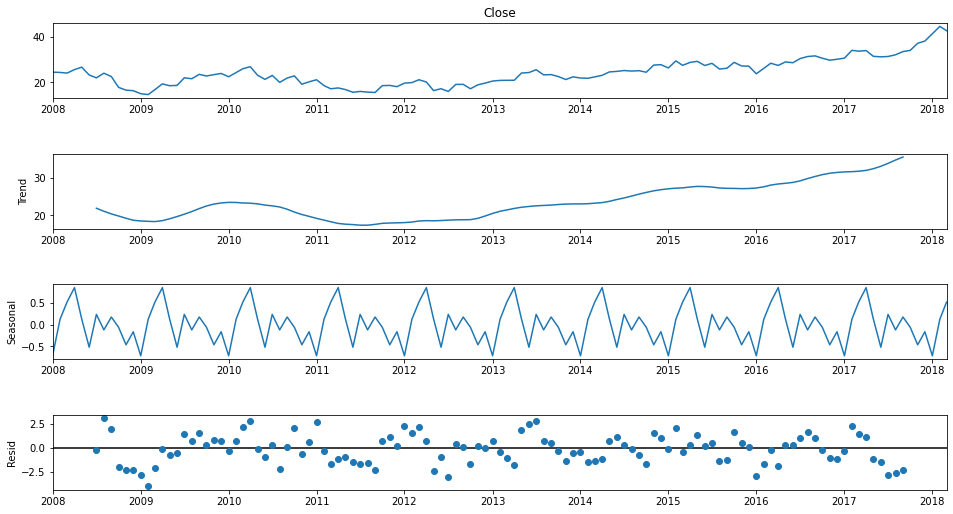

In [16]:
fig=decomp.plot()
fig.set_size_inches(15,8)

In [17]:
df.head()

,Close
Date,
2008-01-01,24.500000
2008-02-01,24.389999
2008-03-01,24.090000
2008-04-01,25.639999
2008-05-01,26.719999


### Dicky Fuller Test
Test if data is stationary or not

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
result = adfuller(df['Close'])

In [20]:
result

(0.6534891111142993,
 0.9888624601263409,
 8,
 114,
 {'1%': -3.489057523907491,
  '5%': -2.887246327182993,
  '10%': -2.5804808802708528},
 422.55469676078735)

In [21]:
def adf_check(time_series):
    
    result=adfuller(time_series)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Obseravtions used']
    
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
        
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non-stationary")

In [22]:
adf_check(df['Close'])

 Augmented Dicky-Fuller Test
ADF Test Statistic : 0.6534891111142993
p-value : 0.9888624601263409
# of lags : 8
Num of Obseravtions used : 114
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [23]:
df['First Difference'] = df['Close'] - df['Close'].shift(1)

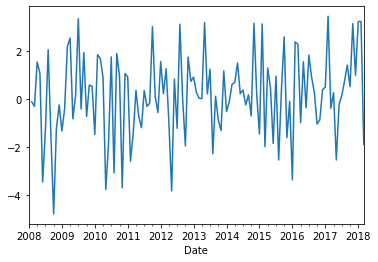

In [24]:
df['First Difference'].plot();

In [25]:
adf_check(df['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -4.005184287983151
p-value : 0.0013836067673780618
# of lags : 7
Num of Obseravtions used : 114
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [26]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [27]:
adf_check(df['Second Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -7.475305154218363
p-value : 4.9316711577068795e-11
# of lags : 5
Num of Obseravtions used : 115
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

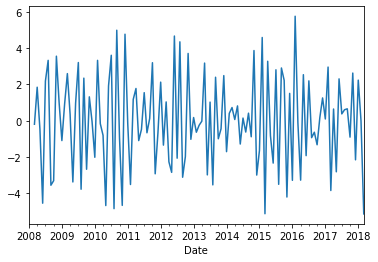

In [28]:
df['Second Difference'].plot()

#### The above shows the data is stationary as p-value is < 0.05
The below is just to show in case we need a second difference

In [29]:
df['Seasonal Difference'] = df['Close'] - df['Close'].shift(12)

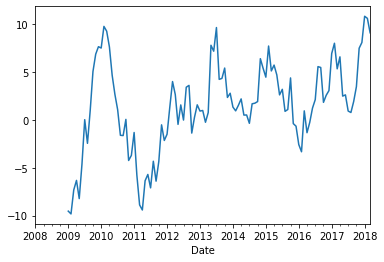

In [30]:
df['Seasonal Difference'].plot();

In [31]:
adf_check(df['Seasonal Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -1.6733565744443164
p-value : 0.44488959480008
# of lags : 12
Num of Obseravtions used : 98
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [32]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

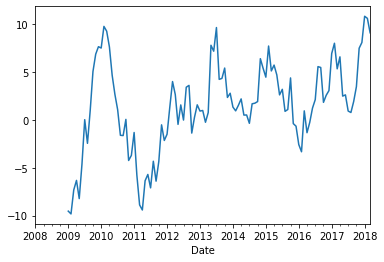

In [33]:
df['Seasonal Difference'].plot();

In [34]:
adf_check(df['Seasonal First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -5.350880547299244
p-value : 4.29203536885414e-06
# of lags : 13
Num of Obseravtions used : 96
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

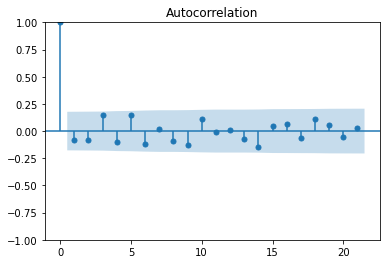

In [36]:
fig_first = plot_acf(df['First Difference'].dropna())

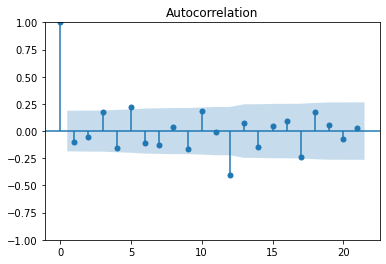

In [37]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


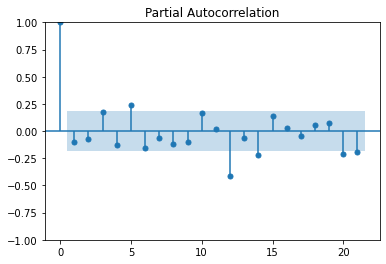

In [38]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


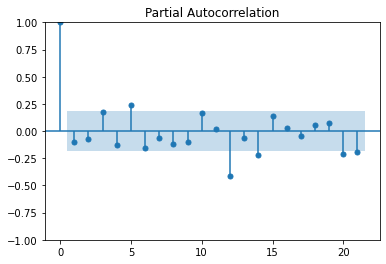

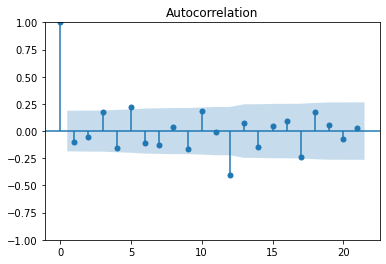

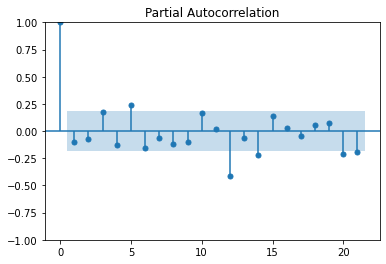

In [39]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())

In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [41]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(*args, **kwargs)
 |  
 |  ARIMA has been deprecated in favor of the new implementation
 |  
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |  
 |  Method resolution order:
 |      ARIMA
 |      ARMA
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from ARMA:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [42]:
model = sm.tsa.statespace.SARIMAX(df['Close'],order=(1,1,0),seasonal_order=(1,1,1,12))

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [43]:
results = model.fit()

In [44]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  123
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -229.802
Date:                              Mon, 18 Apr 2022   AIC                            467.603
Time:                                      15:39:14   BIC                            478.405
Sample:                                  01-01-2008   HQIC                           471.985
                                       - 03-01-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0663      0.101     -0.659      0.510      -0.264       0.131
ar.S.L12       0.01

In [45]:
results.resid

Date
2008-01-01    24.500000
2008-02-01    -0.109996
2008-03-01    -0.300000
2008-04-01     1.549999
2008-05-01     1.080001
                ...    
2017-11-01     3.527171
2017-12-01     0.875862
2018-01-01     3.794145
2018-02-01     2.394732
2018-03-01    -2.102910
Length: 123, dtype: float64

<AxesSubplot:xlabel='Date'>

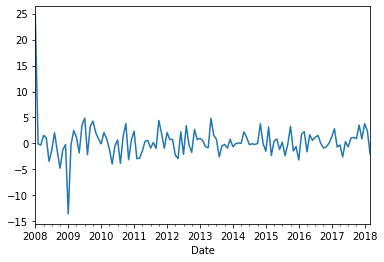

In [46]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

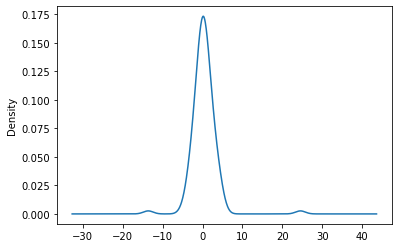

In [47]:
results.resid.plot(kind='kde')

In [48]:
df.shape

(123, 5)

<AxesSubplot:xlabel='Date'>

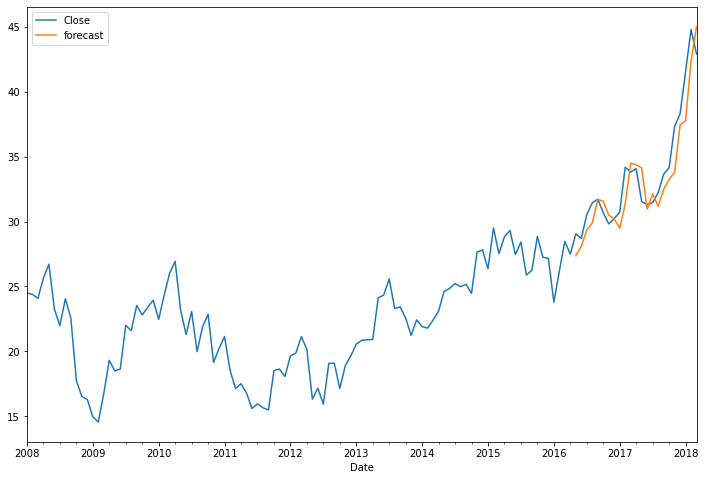

In [49]:
df['forecast'] = results.predict(start=100,end=123)
df[['Close','forecast']].plot(figsize=(12,8))

In [50]:
df.tail()

,Close,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Date,,,,,,
2017-11-01,37.299999,3.149998,2.629997,7.480000,4.009998,33.772829
2017-12-01,38.299999,1.000000,-2.149998,8.080000,0.600000,37.424138
2018-01-01,41.540001,3.240002,2.240002,10.820002,2.740002,37.745856
2018-02-01,44.779999,3.239998,-0.000004,10.599998,-0.220003,42.385266
2018-03-01,42.889999,-1.889999,-5.129997,9.090000,-1.509998,44.992909


In [51]:
from pandas.tseries.offsets import DateOffset

In [52]:
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(1,24)]

In [53]:
future_dates

[Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00')]

In [54]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)

In [55]:
future_df

,Close,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
final_df = pd.concat([df,future_df])

In [57]:
final_df.head()

,Close,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
2008-01-01,24.5,NaN,NaN,NaN,NaN,NaN
2008-02-01,24.389999,-0.110001,NaN,NaN,NaN,NaN
2008-03-01,24.09,-0.299999,-0.189999,NaN,NaN,NaN
2008-04-01,25.639999,1.549999,1.849998,NaN,NaN,NaN
2008-05-01,26.719999,1.08,-0.469999,NaN,NaN,NaN


In [58]:
final_df.tail()

,Close,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
2019-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
final_df.shape

(146, 6)

In [60]:
final_df['forecast'] = results.predict(start=122,end=146)

In [61]:
final_df.tail()

,Close,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
2019-10-01,NaN,NaN,NaN,NaN,NaN,45.805521
2019-11-01,NaN,NaN,NaN,NaN,NaN,45.974787
2019-12-01,NaN,NaN,NaN,NaN,NaN,46.418920
2020-01-01,NaN,NaN,NaN,NaN,NaN,46.422617
2020-02-01,NaN,NaN,NaN,NaN,NaN,47.779903


<AxesSubplot:>

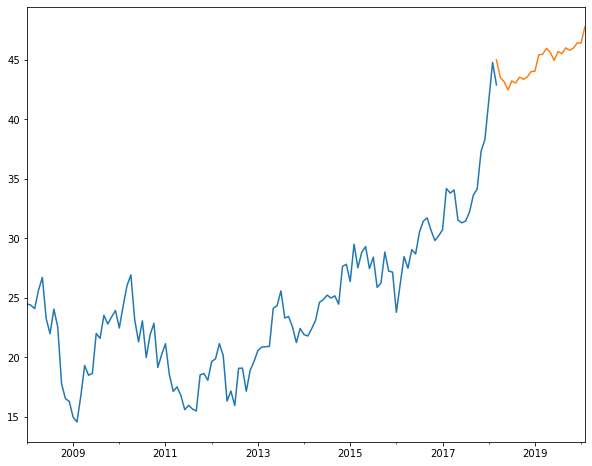

In [62]:
final_df['Close'].plot(figsize=(10,8))
final_df['forecast'].plot()

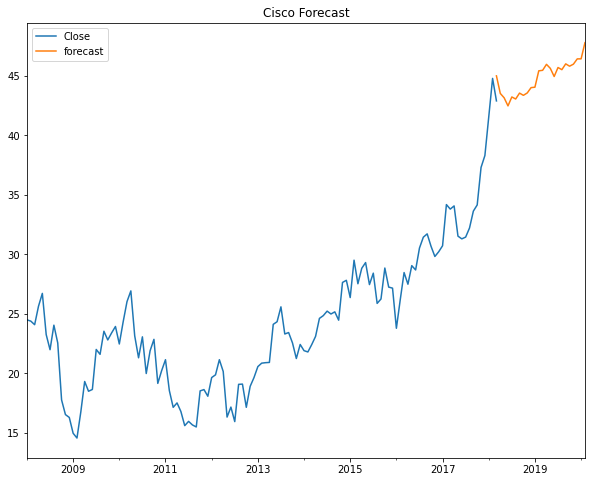

In [63]:
final_df[['Close','forecast']].plot(figsize=(10,8));
plt.title('Cisco Forecast')
plt.savefig('future_forecast_CSCO.png')

In [64]:
open_price = df['Close'][-1]
open_price

42.88999938964844

In [65]:
no_of_shares = 400000/open_price
no_of_shares

9326.18339221848

In [66]:
final_price=final_df['forecast'][-1]
final_price

47.77990282893506

In [67]:
price_diff = final_price-open_price
price_diff

4.88990343928662

In [68]:
P_L = price_diff*no_of_shares
P_L

45604.1362450269